# Twitter Richard Branson Data Analysis

In [306]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [307]:
# Pulling CSV with Twitter information. Check ceo_name.ipynb for data extraction
columns_chosed = ['created_at','full_text','id','source','favorite_count','retweet_count']

ceo_tweets = pd.read_csv("data/branson.csv")
ceo_tweets = ceo_tweets[columns_chosed]

In [308]:
# Filtering Dataframe for tweets since 2019
ceo_tweets["created_at"] = pd.to_datetime(ceo_tweets["created_at"]).dt.date
ceo_tweets["created_at"] = pd.to_datetime(ceo_tweets["created_at"])
ceo_tweets = ceo_tweets[ceo_tweets["created_at"]>='2019-01-01']
ceo_tweets.head()

,created_at,full_text,id,source,favorite_count,retweet_count
0,2021-11-30,These @made51_unhcr decorations are handmade b...,1465791091907698697,"<a href=""http://twitter.com/download/iphone"" r...",163,51
1,2021-11-29,Thank you for the wonderful tribute @VirginAtl...,1465338314580443148,"<a href=""https://mobile.twitter.com"" rel=""nofo...",400,32
2,2021-11-28,It’s that time of year again – feels like it h...,1464922302542487554,"<a href=""https://studio.twitter.com"" rel=""nofo...",334,42
3,2021-11-25,@HollyBranson I wouldn’t want to be anywhere e...,1463914460297445387,"<a href=""https://mobile.twitter.com"" rel=""nofo...",37,2
4,2021-11-24,This is the moment we told Keisha Schahaff she...,1463524912459657219,"<a href=""https://studio.twitter.com"" rel=""nofo...",803,104


### Tweets DF and Sentimental Analysis

In [309]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [310]:
# Clean The Text
ceo_tweets['full_text'] = ceo_tweets['full_text'].apply(cleantext)
ceo_tweets.head()

,created_at,full_text,id,source,favorite_count,retweet_count
0,2021-11-30,These _unhcr decorations are handmade by refug...,1465791091907698697,"<a href=""http://twitter.com/download/iphone"" r...",163,51
1,2021-11-29,Thank you for the wonderful tribute,1465338314580443148,"<a href=""https://mobile.twitter.com"" rel=""nofo...",400,32
2,2021-11-28,It’s that time of year again – feels like it h...,1464922302542487554,"<a href=""https://studio.twitter.com"" rel=""nofo...",334,42
3,2021-11-25,I wouldn’t want to be anywhere else!,1463914460297445387,"<a href=""https://mobile.twitter.com"" rel=""nofo...",37,2
4,2021-11-24,This is the moment we told Keisha Schahaff she...,1463524912459657219,"<a href=""https://studio.twitter.com"" rel=""nofo...",803,104


In [311]:
# Checking weekends:
ceo_tweets["Day of Week"] = ceo_tweets['created_at'].dt.dayofweek
ceo_tweets.head()

,created_at,full_text,id,source,favorite_count,retweet_count,Day of Week
0,2021-11-30,These _unhcr decorations are handmade by refug...,1465791091907698697,"<a href=""http://twitter.com/download/iphone"" r...",163,51,1
1,2021-11-29,Thank you for the wonderful tribute,1465338314580443148,"<a href=""https://mobile.twitter.com"" rel=""nofo...",400,32,0
2,2021-11-28,It’s that time of year again – feels like it h...,1464922302542487554,"<a href=""https://studio.twitter.com"" rel=""nofo...",334,42,6
3,2021-11-25,I wouldn’t want to be anywhere else!,1463914460297445387,"<a href=""https://mobile.twitter.com"" rel=""nofo...",37,2,3
4,2021-11-24,This is the moment we told Keisha Schahaff she...,1463524912459657219,"<a href=""https://studio.twitter.com"" rel=""nofo...",803,104,2


In [312]:
ceo_tweets['orig_date'] = ceo_tweets['created_at']

for i in range(ceo_tweets.shape[0]):
    if ceo_tweets['Day of Week'].loc[i] == 5:
        ceo_tweets['created_at'].loc[i] = ceo_tweets['created_at'].loc[i]+ datetime.timedelta(days=2)
    if ceo_tweets['Day of Week'].loc[i] == 6:
        ceo_tweets['created_at'].loc[i] = ceo_tweets['created_at'].loc[i]+ datetime.timedelta(days=1)
# stock_tweets_df = ceo_tweets.merge(stock_df,how='outer', on='date')
# stock_tweets_df
ceo_tweets.head()

,created_at,full_text,id,source,favorite_count,retweet_count,Day of Week,orig_date
0,2021-11-30,These _unhcr decorations are handmade by refug...,1465791091907698697,"<a href=""http://twitter.com/download/iphone"" r...",163,51,1,2021-11-30
1,2021-11-29,Thank you for the wonderful tribute,1465338314580443148,"<a href=""https://mobile.twitter.com"" rel=""nofo...",400,32,0,2021-11-29
2,2021-11-29,It’s that time of year again – feels like it h...,1464922302542487554,"<a href=""https://studio.twitter.com"" rel=""nofo...",334,42,6,2021-11-28
3,2021-11-25,I wouldn’t want to be anywhere else!,1463914460297445387,"<a href=""https://mobile.twitter.com"" rel=""nofo...",37,2,3,2021-11-25
4,2021-11-24,This is the moment we told Keisha Schahaff she...,1463524912459657219,"<a href=""https://studio.twitter.com"" rel=""nofo...",803,104,2,2021-11-24


In [313]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['full_text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
ceo_tweets[["subjectivity", "polarity"]] = ceo_tweets.apply(sentiment_analysis, axis=1)

In [314]:
ceo_tweets = (    
    ceo_tweets.groupby(["created_at"])
    .agg(
        Tweets=("full_text", "sum"),
        Agg_count=("full_text", "count"),
        Agg_retweet=("retweet_count", "sum"),
        Agg_favorite=("favorite_count", "sum"),
        Subjectivity_mean=("subjectivity", "mean"),
        Polarity_mean=("polarity", "mean"),
    )
    .reset_index()
)
ceo_tweets = ceo_tweets.rename(columns={"created_at":'Date'})
ceo_tweets.head()

,Date,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean
0,2019-03-11,Giving the final say on the Brexit deal to the...,12,587,2721,0.734722,0.404861
1,2019-03-12,Working hard preparing for my spaceflight. In...,10,505,2629,0.424318,0.176629
2,2019-03-13,The small things make a big difference. _Orbit...,7,257,1506,0.575000,0.134524
3,2019-03-14,"As the late, great Kofi Annan said: “You are n...",9,740,2840,0.511837,0.187605
4,2019-03-15,Fantastic to see the US backing council to sup...,9,926,4985,0.562332,0.376299


In [316]:
#Polarity Change
ceo_tweets["Polarity_chg"] = np.log(ceo_tweets["Polarity_mean"]/ceo_tweets["Polarity_mean"].shift())
ceo_tweets["Polarity_chg"] = ceo_tweets["Polarity_chg"].fillna(0)
ceo_tweets.head()

,Date,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_chg
0,2019-03-11,Giving the final say on the Brexit deal to the...,12,587,2721,0.734722,0.404861,0.000000
1,2019-03-12,Working hard preparing for my spaceflight. In...,10,505,2629,0.424318,0.176629,-0.829494
2,2019-03-13,The small things make a big difference. _Orbit...,7,257,1506,0.575000,0.134524,-0.272309
3,2019-03-14,"As the late, great Kofi Annan said: “You are n...",9,740,2840,0.511837,0.187605,0.332595
4,2019-03-15,Fantastic to see the US backing council to sup...,9,926,4985,0.562332,0.376299,0.696047


### Stock Data Cleaning

In [317]:
# Getting Data Stock prices. Source: Yahoo Finance.
stock = pd.read_csv("data/SPCE.csv")
stock_df = stock[['Date','Close']]

# Calculating Stock Price Variation
stock_df['Return'] = stock_df['Close']
stock_df['Return']= np.log(stock_df['Close']/stock_df['Close'].shift())

stock_df["Date"] = pd.to_datetime(stock_df["Date"]).dt.date
stock_df["Date"] = pd.to_datetime(stock_df["Date"])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    735 non-null    datetime64[ns]
 1   Close   735 non-null    float64       
 2   Return  734 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.4 KB


### Mergin Stocks and Tweets DFs

In [318]:
df_stock_tweets = stock_df.merge(ceo_tweets, how='left', on='Date')
df_stock_tweets.head()

,Date,Close,Return,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_chg
0,2019-01-02,10.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,10.00,-0.001998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10.04,0.003992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,10.03,-0.000997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,10.04,0.000997,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
colnan = ['Agg_count','Agg_retweet','Agg_favorite','Subjectivity_mean','Polarity_mean','Polarity_chg']
for col in colnan:
    df_stock_tweets[col] = df_stock_tweets[col].fillna(0)

df_stock_tweets['Tweets'] = df_stock_tweets['Tweets'].fillna('')

df_stock_tweets.head()

,Date,Close,Return,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_chg
0,2019-01-02,10.02,NaN,,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-03,10.00,-0.001998,,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,10.04,0.003992,,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,10.03,-0.000997,,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-08,10.04,0.000997,,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
df_stock_tweets.to_csv('data/branson_cleaned.csv', index=False)

### Plots to be Updated!

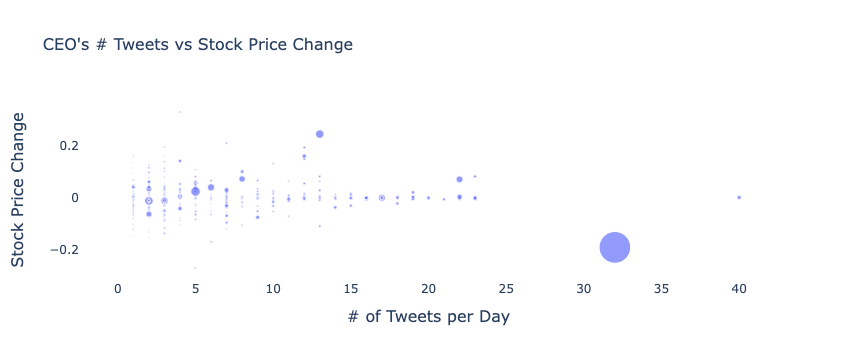

In [321]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= df_stock_tweets['Agg_count'],
    y= df_stock_tweets['Return'],
    mode="markers",
    marker={"size": df_stock_tweets['Agg_favorite'], "sizemode": "area",
                                    "sizeref": 2*max(df_stock_tweets['Agg_favorite']/1000)},
    hovertemplate= "Number of Tweets per Day: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    xaxis={"title": {"text": "# of Tweets per Day", "font": {"size": 16}}},
    # hovermode="x",
    title={'text': "CEO's # Tweets vs Stock Price Change", "font": {"size": 16}}
)
fig.show()

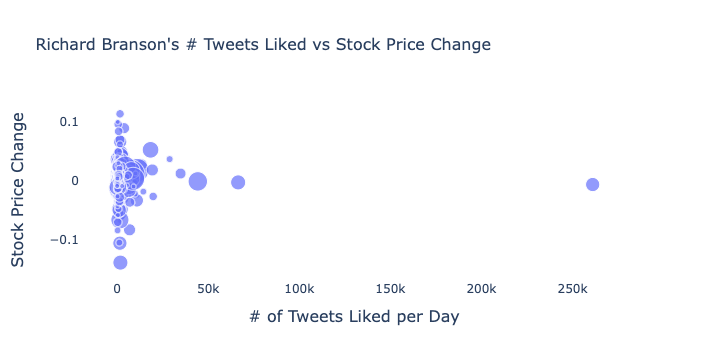

In [263]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= branson_df['favorite_count'],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": branson_df['tweet_count'], "sizemode": "area",
                                    "sizeref": 2*max(branson_df['tweet_count']/1000)},
    hovertemplate= "Number of Tweets Liked per Day: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Tweets: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    xaxis={"title": {"text": "# of Tweets Liked per Day", "font": {"size": 16}}},
    # hovermode="x",
    title={'text': "Richard Branson's # Tweets Liked vs Stock Price Change", "font": {"size": 16}}
)
fig.show()

In [264]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= branson["polarity_chg"],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": branson_df['favorite_count'], "sizemode": "area",
                                    "sizeref": 2*max(branson_df['favorite_count']/1000)},
    hovertemplate= "Polarity of Tweets: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    # hovermode="x",
    xaxis={"title": {"text": "Sentiment Change", "font": {"size": 16}}},
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    title={'text': "Richard Branson's Tweets Sentiment Change vs Virgin Galactic's Stock Price Change", "font": {"size": 16}}
)
fig.show()

KeyError: 'polarity_chg'

## Word Clound

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in branson['full_text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()